#Notes:

Dataset not balanced. Oversample or undersample?

| Left | Count |
|------|-------|
| 0    | 11428 |
| 1    | 3571  |


---



# BIG DATA ANALYTICS - Project - GROUP B

## Group Members

| Student Name | Student ID |
|----------|----------|
| Allyssa Sampath    | 816032362     |
| Avinash Roopnarine    | 816029635     |
| Jared Heeralal    | 816030252     |
| Kimberly Moses   | 816031494     |


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_excel('HR_Employee_Data.xlsx')

df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

#Cleaning

In [3]:
# Handle categorical variables: 'Department' and 'salary'
df = pd.get_dummies(df, columns=['Department', 'salary'])

df.dropna(inplace=True)
df = df.drop(['Emp_Id'], axis=1)

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False


In [ ]:
df.info()

A pairplot is a grid of scatterplots showing the relationship between pairs of variables in a dataset.

In [ ]:
# Perform exploratory data analysis (EDA)
# Visualize feature distributions and relationships

# sns.pairplot(df, diag_kind='kde', hue='left')
# plt.show()

sns.pairplot(df, hue='left', palette='Set2')
plt.show()

#K-Means for Employee Clustering

In [ ]:
# Calculate and visualise correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Identify important features based on correlation with the target variable ('left')
important_features = correlation_matrix['left'].sort_values(ascending=False)
print("Important Features:")
print(important_features)

# Choose features with high absolute correlation values with the target variable
selected_features = ['satisfaction_level', 'time_spend_company', 'average_montly_hours', 'number_project']
selected_features += ['last_evaluation', 'Work_accident', 'promotion_last_5years', 'salary_low', 'salary_medium', 'salary_high']

df_subset = df[selected_features]

print("DataFrame with Selected Features:")
df_subset.head()

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_subset)


# Elbow method
inertia_values = []
num_clusters_range = range(1, 11)
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Print inertia values for each number of clusters
# print("Number of Clusters | Inertia")
# for num_clusters, inertia in zip(num_clusters_range, inertia_values):
#     print(f"{num_clusters:18d} | {inertia:.2f}")

plt.plot(num_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [ ]:
# Silhouette scores methof
silhouette_scores = []
num_clusters_range = range(2, 11)
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [ ]:
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# Add cluster labels to DataFrame
df['cluster'] = kmeans.labels_

# Analyze and interpret clusters
cluster_summary = df.groupby('cluster')[selected_features].mean()
print("Cluster Summary:")
cluster_summary

In [ ]:
# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(df[df['cluster'] == cluster]['satisfaction_level'], df[df['cluster'] == cluster]['last_evaluation'], label=f'Cluster {cluster}')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Employee Clustering based on Satisfaction and Evaluation')
plt.legend()
plt.show()

- **Cluster 0:** This cluster represents employees with a moderately high satisfaction level (0.650), average time spent in the company (3.012 years), and moderate workload. They have a relatively low occurrence of work accidents (0.159) and are mostly in low-salary positions (1.0).
- **Cluster 1:** Employees in this cluster have similar satisfaction levels to Cluster 0 but slightly longer tenure (3.424 years) and higher average monthly hours (196). They are more evenly distributed across salary levels.
- **Cluster 2:** This cluster represents employees with lower satisfaction levels (0.394), longer tenure (4.683 years), and higher workload compared to other clusters. They have a significantly higher last evaluation score (0.855) and are primarily in low-salary positions (0.793).
- **Cluster 3:** Employees in this cluster have similar satisfaction levels to Cluster 0 and 1 but longer tenure (4.166 years) and slightly higher work accident rates (0.238). They have a mix of salary levels, with a relatively higher proportion in medium-salary positions (0.567).
- **Cluster 4:** This cluster represents employees with similar characteristics to Cluster 0 and 1 in terms of satisfaction level, but slightly longer tenure (3.582 years) and similar workload. They are mostly in high-salary positions (1.0).

Overall, these clusters provide insights into different groups of employees based on their satisfaction levels, tenure, workload, and salary levels.

#Cox Survival Analysis

Will split it up into different cells when I am done testing. Just experimenting atm but have to run the previous cell
with other cox implementation to get balanced dataset. Will fix that after. Have to find a way to get an estimate time but 
at the moment I have only found way to get the estimate time of the left sample using their median as well as looking at
at the hazard function to see which years are at the most risk of early resignation. Need to do more research to find 
another way

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame
y = df['time_spend_company']  # Target variable for regression
X = df.drop(columns=['time_spend_company', 'left'])  # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the models
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
gbm_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
logistic_reg = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, (y_train > np.median(y_train)).astype(int))  # Assuming binary classification

# Extract feature importances or coefficients
features = X_train.columns
rf_results = pd.DataFrame({'Feature': features, 'Importance_RF': rf_regressor.feature_importances_}).sort_values(by='Importance_RF', ascending=False)
gbm_results = pd.DataFrame({'Feature': features, 'Importance_GBM': gbm_regressor.feature_importances_}).sort_values(by='Importance_GBM', ascending=False)
linear_results = pd.DataFrame({'Feature': features, 'Coefficient_Linear': linear_reg.coef_}).sort_values(by='Coefficient_Linear', ascending=False, key=lambda col: abs(col))
logistic_results = pd.DataFrame({'Feature': features, 'Coefficient_Logistic': logistic_reg.coef_[0]}).sort_values(by='Coefficient_Logistic', ascending=False)

# Print the sorted results
print("Random Forest Feature Importances (Higher = More Important for Longer Tenure):")
print(rf_results)
print("\nGradient Boosting Feature Importances (Higher = More Important for Longer Tenure):")
print(gbm_results)
print("\nLinear Regression Coefficients (Higher Absolute Value = More Important, Positive = Longer Tenure):")
print(linear_results)
print("\nLogistic Regression Coefficients (Higher = More Likely Above Median Tenure):")
print(logistic_results)


Random Forest Feature Importances (Higher = More Important for Longer Tenure):
                   Feature  Importance_RF
0       satisfaction_level       0.254485
3     average_montly_hours       0.250691
1          last_evaluation       0.188767
2           number_project       0.078392
4            Work_accident       0.029060
10   Department_management       0.024125
16             salary_high       0.020279
13        Department_sales       0.019770
18           salary_medium       0.018172
17              salary_low       0.017209
5    promotion_last_5years       0.014266
14      Department_support       0.013829
11    Department_marketing       0.013197
6            Department_IT       0.012828
15    Department_technical       0.011989
8    Department_accounting       0.010165
12  Department_product_mng       0.009657
7         Department_RandD       0.007063
9            Department_hr       0.006055

Gradient Boosting Feature Importances (Higher = More Important for Longer Tenure

In [ ]:
pip install tensorflow

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your cleaned dataset
left_df = df[df['left'] == 1]  # Filter for employees who have left

# Split the dataset into features (X) and target variable (y)
X = left_df.drop(columns=['time_spend_company'])
y = left_df['time_spend_company']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'Neural Network Regression': MLPRegressor(random_state=42),
    'Support Vector Regression': SVR()
}

# Dictionary to hold predictions
predictions = {}
rmse_values = {}

# Train and predict with each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_values[name] = rmse
    print(f"{name} - Root Mean Squared Error: {rmse}")
    predictions[name] = model.predict(scaler.transform(X))  # Predict on the entire dataset

# Add estimated times back to the DataFrame
for name, pred in predictions.items():
    left_df[f'estimated_time_{name.lower().replace(" ", "_")}'] = pred

# Print the first five rows of the updated DataFrame
# print(left_df.tail(5))

Linear Regression - Root Mean Squared Error: 0.4975365673572474
Random Forest Regression - Root Mean Squared Error: 0.33572966147542815
Gradient Boosting Regression - Root Mean Squared Error: 0.4150487049015014


C:\Users\Avinash Roopnarine\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Regression - Root Mean Squared Error: 0.44879891031500097
Support Vector Regression - Root Mean Squared Error: 0.47854425510485604


C:\Users\Avinash Roopnarine\AppData\Local\Temp\ipykernel_26376\11328459.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df[f'estimated_time_{name.lower().replace(" ", "_")}'] = pred
C:\Users\Avinash Roopnarine\AppData\Local\Temp\ipykernel_26376\11328459.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df[f'estimated_time_{name.lower().replace(" ", "_")}'] = pred
C:\Users\Avinash Roopnarine\AppData\Local\Temp\ipykernel_26376\11328459.py:49: SettingWithCopyWarning: 
A value is trying to be 

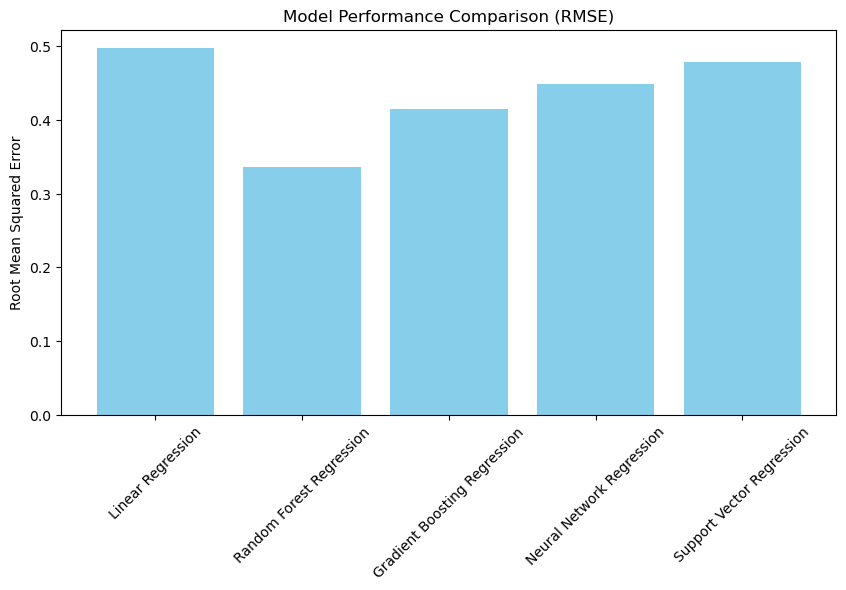

In [15]:
# Visualization
plt.figure(figsize=[10,5])  # Set the figure size for better readability
plt.bar(rmse_values.keys(), rmse_values.values(), color='skyblue')  # Create a bar chart
plt.title('Model Performance Comparison (RMSE)')  # Title of the plot
plt.ylabel('Root Mean Squared Error')  # Y-axis label
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()  # Show the plot